<a href="https://colab.research.google.com/github/DogwonLee/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B4%EB%8F%84%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이도권: 룸 타입을 통한 기존 호텔과 다른 에어비앤비의 경쟁력

##데이터 LOAD

In [1]:
import pandas as pd

In [2]:
#데이터 불러오기
data = pd.read_csv('/content/combined_dataset.csv')

In [ ]:
#데이터 훑어보기
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.96,4.93,4.86,NaN,t,70,69,0,0,0.18
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.86,4.97,4.69,NaN,t,70,69,0,0,0.69
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.96,4.93,4.89,NaN,f,3,3,0,0,3.32
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.69,4.94,4.50,NaN,t,70,69,0,0,0.10
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.84,4.90,4.79,NaN,f,1,1,0,0,2.01


##여긴 어디인가?

In [ ]:
#동네 종류
data['neighbourhood_cleansed'].unique()

array(['Praha 1', 'Praha 2', 'Praha 3', 'Praha 7', 'Praha 5', 'Praha 15',
       'Praha 8', 'Praha 9', 'Praha 10', 'Praha 6', 'Praha 4', 'Praha 14',
       'Praha 13', 'Velká Chuchle', 'Kunratice', 'Zličín', 'Zbraslav',
       'Petrovice', 'Praha 21', 'Suchdol', 'Praha 12', 'Praha 11',
       'Praha 16', 'Klánovice', 'Praha 17', 'Šeberov', 'Štěrboholy',
       'Ďáblice', 'Dolní Počernice', 'Praha 18', 'Libuš', 'Řeporyje',
       'Březiněves', 'Nebušice', 'Satalice', 'Praha 22', 'Troja',
       'Dolní Chabry', 'Čakovice', 'Praha 19', 'Lipence', 'Újezd',
       'Dolní Měcholupy', 'Slivenec', 'Praha 20', 'Lysolaje', 'Vinoř',
       'Nedvězí', 'Koloděje', 'Přední Kopanina', 'Běchovice', 'Kolovraty',
       'Dubeč'], dtype=object)

##데이터 뜯어보기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            11446 non-null  int64   
 1   listing_url                                   11446 non-null  object  
 2   scrape_id                                     11446 non-null  int64   
 3   last_scraped                                  11446 non-null  object  
 4   source                                        11446 non-null  object  
 5   name                                          11446 non-null  object  
 6   description                                   9276 non-null   object  
 7   neighborhood_overview                         5663 non-null   object  
 8   picture_url                                   11446 non-null  object  
 9   host_id                                       1144

In [ ]:
#슈퍼호스트 컬럼의 Null값 개수
data['host_is_superhost'].isna().sum()

np.int64(273)

In [ ]:
#슈퍼호스트 컬럼의 Null값 비율
data['host_is_superhost'].isna().sum() / data['host_is_superhost'].count() # 2.4% 정도니 그냥 버리자!

np.float64(0.02443390315940213)



---



##Room Type

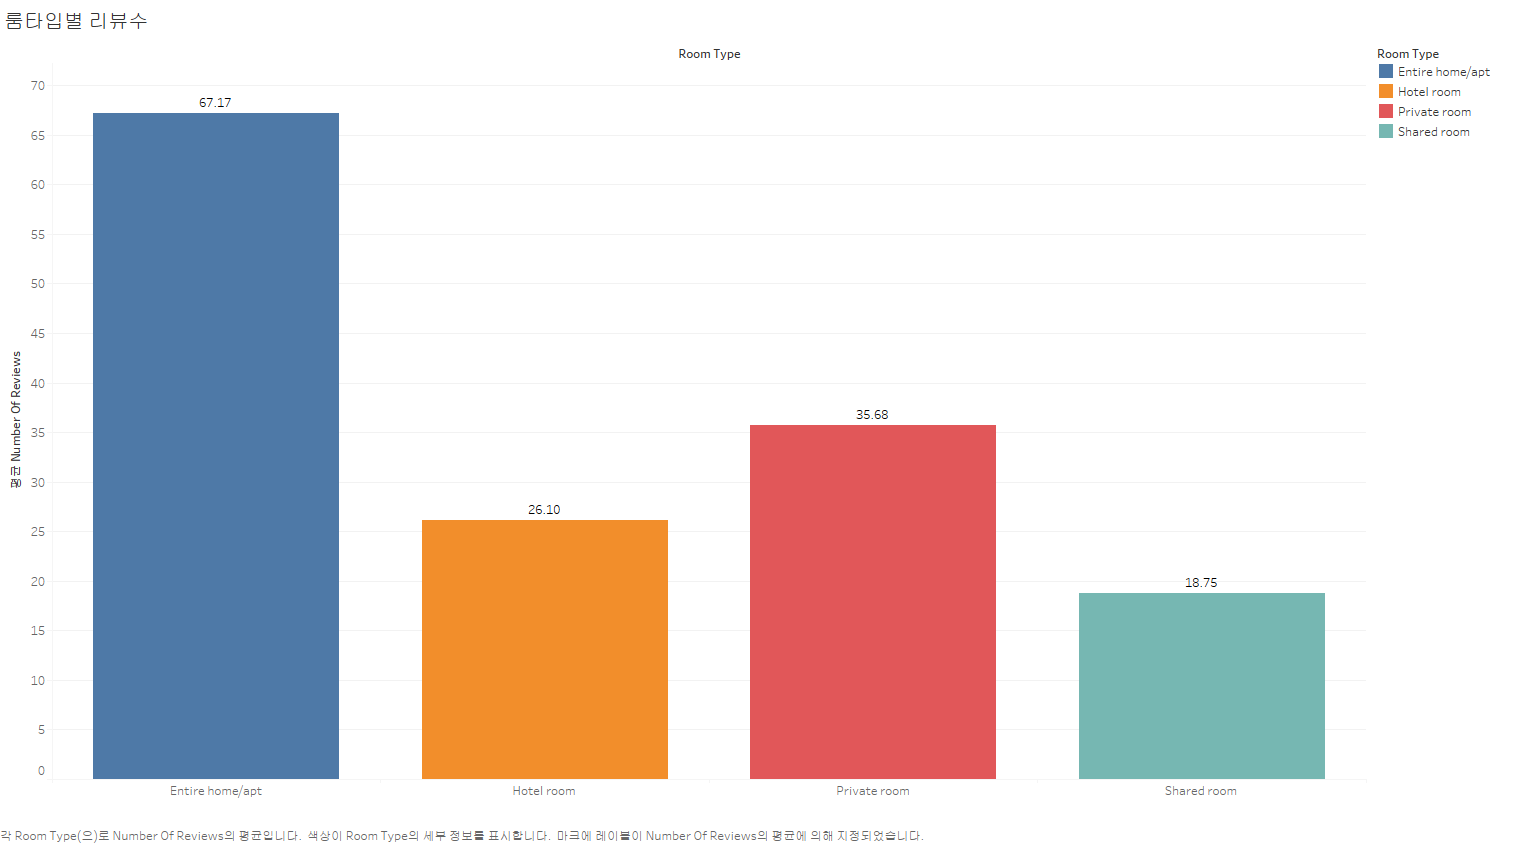

In [ ]:
# 룸타입 종류
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
# 룸타입의 결측치
data['room_type'].isna().sum() #없네.

np.int64(0)

In [28]:
# 룸타입별 가격
data2 = pd.read_csv('/content/airbnb_with_price_num.csv')

In [ ]:
data2[['room_type','price_num']]

,room_type,price_num
0,Entire home/apt,3955.0
1,Entire home/apt,2955.0
2,Entire home/apt,3223.0
3,Entire home/apt,6741.0
4,Entire home/apt,2763.0
...,...,...
11441,Private room,523.0
11442,Entire home/apt,2357.0
11443,Entire home/apt,1120.0
11444,Private room,1141.0


In [ ]:
# 룸타입별 가격
Entire_home_prices = data2[data2['room_type'] == 'Entire home/apt']['price_num']
Private_room_prices = data2[data2['room_type'] == 'Private room']['price_num']
Hotel_room_prices = data2[data2['room_type'] == 'Hotel room']['price_num']
Shared_room_prices = data2[data2['room_type'] == 'Shared room']['price_num']

In [ ]:
Entire_home_prices

,price_num
0,3955.0
1,2955.0
2,3223.0
3,6741.0
4,2763.0
...,...
11438,1635.0
11439,1635.0
11440,2400.0
11442,2357.0


In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

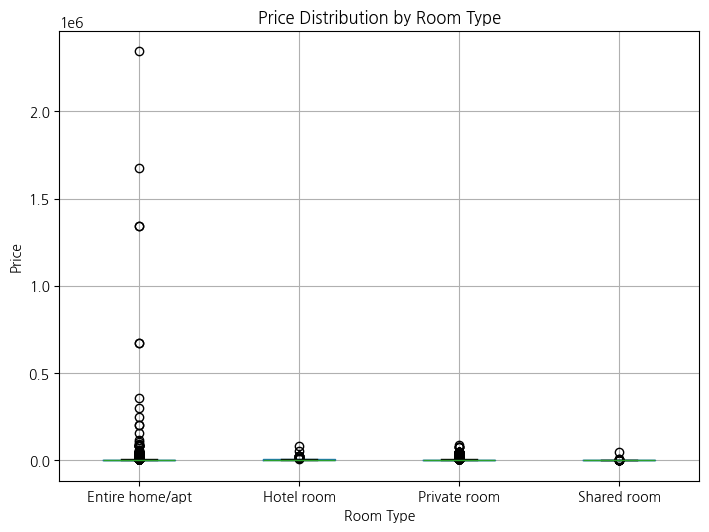

In [ ]:
import matplotlib.pyplot as plt

# DataFrame 이름이 df 라고 가정
data2.boxplot(column='price_num', by='room_type', figsize=(8,6))
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


###룸타입별 이상치 제거

In [ ]:
import numpy as np

In [29]:
import pandas as pd

def remove_outliers_by_type(df, room_type):
    """특정 room_type에 대해 IQR 기준 이상치 제거"""
    subset = df[df['room_type'] == room_type]
    q1  = subset['price_num'].quantile(0.25)
    q3  = subset['price_num'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return df[
        (df['room_type'] != room_type) |
        ((df['room_type'] == room_type) &
         (df['price_num'] >= lower) &
         (df['price_num'] <= upper))
    ]

# 원본을 단계별로 업데이트
no_outlier_all = data2.copy()

for rt in ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']:
    no_outlier_all = remove_outliers_by_type(no_outlier_all, rt)

# 결과 확인
print(no_outlier_all.shape)


(9809, 76)


### 가격을 수치화하고 이상치 제거한 버전 (no_outlier_all)

In [30]:
no_outlier_all

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.93,4.86,NaN,t,70,69,0,0,0.18,3955.0
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.97,4.69,NaN,t,70,69,0,0,0.69,2955.0
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,3223.0
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.94,4.50,NaN,t,70,69,0,0,0.10,6741.0
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.90,4.79,NaN,f,1,1,0,0,2.01,2763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,NaN,t,1,0,1,0,NaN,523.0
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,NaN,f,1,1,0,0,NaN,2357.0
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,NaN,t,2,2,0,0,NaN,1120.0
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,NaN,t,5,0,5,0,NaN,1141.0


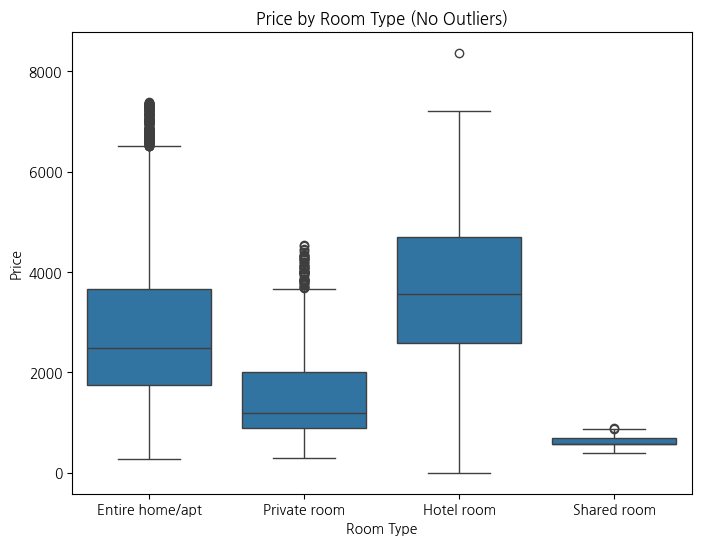

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price_num', data=no_outlier_all)
plt.title('Price by Room Type (No Outliers)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()




---



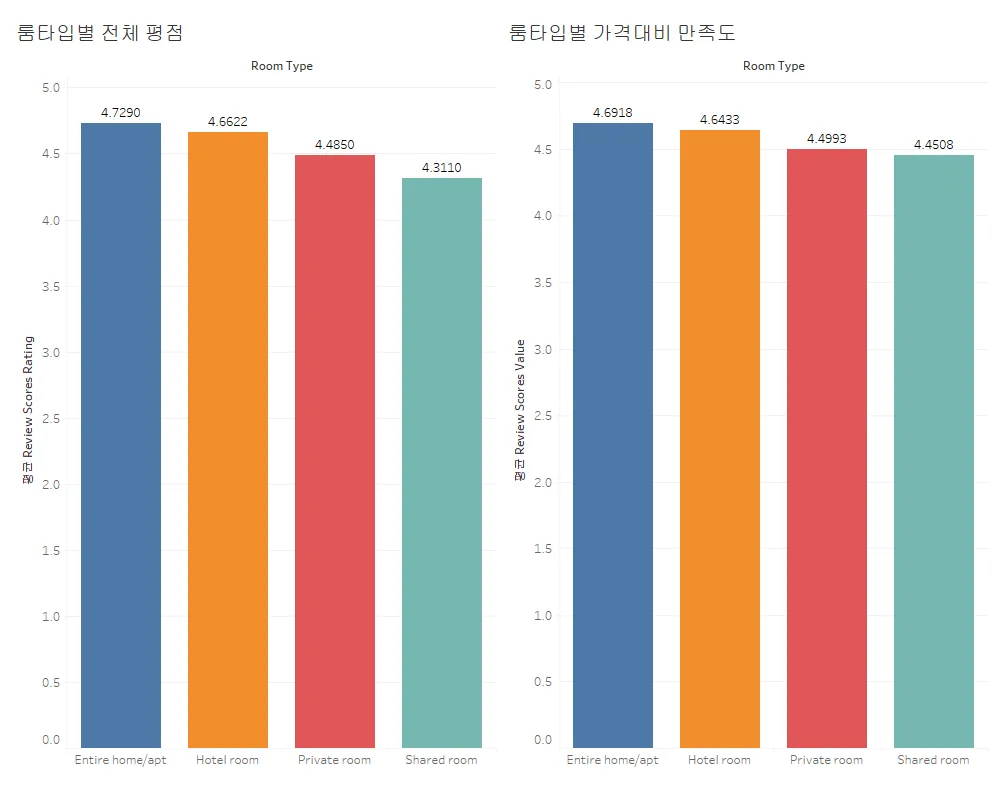

In [11]:
# 평점에도 이상치가 있을까?
num_rating_greater_than_5 = (data['review_scores_rating'] > 5).sum()
print(f"review_scores_rating이 5보다 큰 값의 개수: {num_rating_greater_than_5}")
num_value_greater_than_5 = (data['review_scores_value'] > 5).sum()
print(f"review_scores_value이 5보다 큰 값의 개수: {num_value_greater_than_5}")

review_scores_rating이 5보다 큰 값의 개수: 0
review_scores_value이 5보다 큰 값의 개수: 0


##가격 대비 만족도 (제일 중요한 변수)

In [ ]:
data['review_scores_value']

,review_scores_value
0,4.86
1,4.69
2,4.89
3,4.50
4,4.79
...,...
11441,NaN
11442,NaN
11443,NaN
11444,NaN


In [19]:
data['review_scores_value'].describe()

,review_scores_value
count,9926.000000
mean,4.655840
std,0.415475
min,1.000000
25%,4.580000
50%,4.750000
75%,4.880000
max,5.000000


In [35]:
# 개수
data['review_scores_value'].count()

np.int64(9926)

In [ ]:
# 결측치
data['review_scores_value'].isna().sum()

np.int64(1520)

In [16]:
#가치 대비 만족도 컬럼의 Null값 비율
data['review_scores_value'].isna().sum() / data['review_scores_value'].count() # 15% 정도니 그냥 버리자!

np.float64(0.153133185573242)

##오버롤

In [ ]:
# 평점
data['review_scores_rating']

,review_scores_rating
0,4.90
1,4.73
2,4.94
3,4.75
4,4.76
...,...
11441,NaN
11442,NaN
11443,NaN
11444,NaN


In [ ]:
# 평점의 결측치
data['review_scores_rating'].isna().sum()

np.int64(1495)

In [ ]:
# 평점의 통계값
data['review_scores_rating'].describe()

,review_scores_rating
count,9951.000000
mean,4.682039
std,0.434840
min,0.000000
25%,4.590000
50%,4.800000
75%,4.930000
max,5.000000


In [20]:
# 오버롤 컬럼의 Null값 비율
data['review_scores_rating'].isna().sum() / data['review_scores_rating'].count() # 15% 정도니 그냥 버리자!

np.float64(0.15023615717013367)



---



### last_scraped가 2023-09-17이고 review_scores_rating이 0인 행 수

In [ ]:
num_zero_reviews = ((data['last_scraped'] == '2023-09-17') & (data['review_scores_rating'] == 0)).sum()
print(num_zero_reviews)

0


In [ ]:
# 1. 조건에 맞는 행 필터링
mask = (data['last_scraped'] == '2023-09-17') & (data['review_scores_rating'].isnull())
# 2. 개수 세기
num_null_reviews = mask.sum()
print(num_null_reviews)

84




---



In [ ]:
#리뷰수
data['number_of_reviews']

,number_of_reviews
0,30
1,117
2,358
3,16
4,333
...,...
11441,0
11442,0
11443,0
11444,0


In [ ]:
# 리뷰수의 결측치 개수
data['number_of_reviews'].isna().sum()

np.int64(0)

In [ ]:
# 리뷰수 통계량 파악
data['number_of_reviews'].describe()

,number_of_reviews
count,11446.000000
mean,59.958850
std,99.617144
min,0.000000
25%,3.000000
50%,18.000000
75%,70.000000
max,1801.000000


In [ ]:
data['number_of_reviews'].max()

1801

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

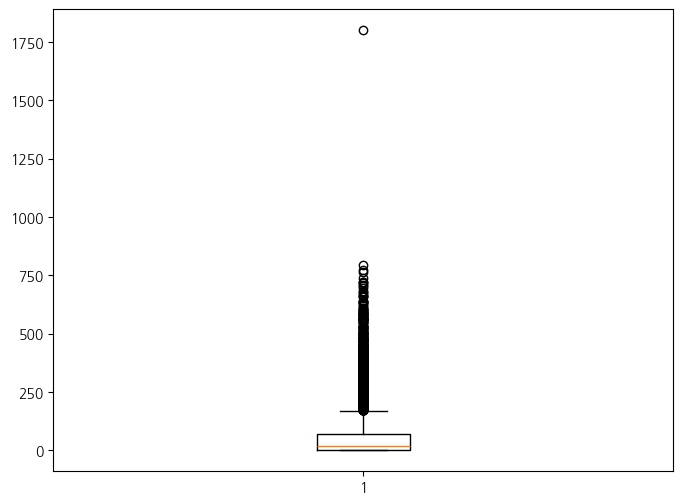

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(data['number_of_reviews']) #bar 차트 구현
plt.show()

In [ ]:
data['price'] # object네? float로 바꿔야겠네!

,price
0,"$3,955.00"
1,"$2,955.00"
2,"$3,223.00"
3,"$6,741.00"
4,"$2,763.00"
...,...
11441,$523.00
11442,"$2,357.00"
11443,"$1,120.00"
11444,"$1,141.00"


In [ ]:
# 결측치 수
data['price'].isna().sum()

np.int64(842)

In [ ]:
# 가격을 숫자로 바꿈
data['price_num'] = (
    data['price']
    .replace('[\$,]', '', regex=True)  # $와 , 모두 제거
    .astype(float)
)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2356986772.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)  # $와 , 모두 제거


In [ ]:
data['price_num']

,price_num
0,"3,955.00"
1,"2,955.00"
2,"3,223.00"
3,"6,741.00"
4,"2,763.00"
...,...
11441,523.00
11442,"2,357.00"
11443,"1,120.00"
11444,"1,141.00"


In [ ]:
data['price_num'].max()

2345699.0

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)
data['price_num'].describe()

,price_num
count,"10,604.00"
mean,"4,376.08"
std,"35,558.97"
min,0.00
25%,"1,536.00"
50%,"2,386.00"
75%,"3,803.00"
max,"2,345,699.00"


In [ ]:
# 가격 통계량
data['price_num'].describe()

,price_num
count,1.060400e+04
mean,4.376076e+03
std,3.555897e+04
min,0.000000e+00
25%,1.536000e+03
50%,2.386000e+03
75%,3.803000e+03
max,2.345699e+06


In [ ]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.93,4.86,NaN,t,70,69,0,0,0.18,"3,955.00"
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.97,4.69,NaN,t,70,69,0,0,0.69,"2,955.00"
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,"3,223.00"
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.94,4.50,NaN,t,70,69,0,0,0.10,"6,741.00"
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.90,4.79,NaN,f,1,1,0,0,2.01,"2,763.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,NaN,t,1,0,1,0,NaN,523.00
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,NaN,f,1,1,0,0,NaN,"2,357.00"
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,NaN,t,2,2,0,0,NaN,"1,120.00"
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,NaN,t,5,0,5,0,NaN,"1,141.00"


In [ ]:
# 예: price_num이 들어있는 DataFrame이 data 라고 할 때
data.to_csv('airbnb_with_price_num.csv', index=False, encoding='utf-8-sig')

## 결측치 제거(no_outlier_all)

###통계 모델용 - 다중 대체




> 다중 대체(Multiple Imputation) 는 데이터에 결측값이 있을 때, 단순히 한 번 채워 넣는 대신 여러 번(다중) 서로 다른 합리적 값으로 채운 뒤 결과를 통합하는 통계적 기법




In [44]:
# 다중 대체를 해보았다.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)
no_outlier_all_imputed = imp.fit_transform(no_outlier_all[['review_scores_value','review_scores_rating']])


In [47]:
# Check!!!
no_outlier_all_imputed_df = pd.DataFrame(no_outlier_all_imputed, columns=['review_scores_value','review_scores_rating'])
no_outlier_all_imputed_df['review_scores_value'].isna().sum()

np.int64(0)

###머신러닝용 - 간단한 수치·범주형 대체 or 모델 내 처리

##**가설**
- 에어비앤비의 정체성인 집 전체 (Entire Hone / Apt) 가 제일 많은 사람들이 찾을 것이다. (Number of Reviews)
    
    집 전체 (Entire Hone / Apt) 가 다른 룸 타입들 보다도 가격 대비 만족도 (Review Scores Value) 가 제일 높을 것이다.

##통계분석 (one-way ANOVA)



1.   독립성 검정
2.   정규성 검정

3.   등분산성 검정






In [50]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.datasets import load_iris

### 정규성

In [49]:
# 측정 변수들의 짧은 이름 정의
measurements = ['review_scores_value', 'review_scores_rating']
short_names = ['가성비 평점', '전체 평점']

In [ ]:
qqplot()

In [52]:
print("=== 정규성 검정 (Shapiro-Wilk Test) ===")
print("H0: 데이터가 정규분포를 따른다")
print("p > 0.05이면 정규성 가정 충족\n")

# Combine room_type with imputed review scores
imputed_data_with_room_type = no_outlier_all[['room_type']].copy()
imputed_data_with_room_type['review_scores_value_imputed'] = no_outlier_all_imputed_df['review_scores_value']
imputed_data_with_room_type['review_scores_rating_imputed'] = no_outlier_all_imputed_df['review_scores_rating']


measurements_imputed = ['review_scores_value_imputed', 'review_scores_rating_imputed']

for measure, name in zip(measurements_imputed, short_names):
    print(f"[{name}]")
    for rooms in imputed_data_with_room_type['room_type'].unique():
        data = imputed_data_with_room_type[imputed_data_with_room_type['room_type'] == rooms][measure].dropna() # Drop NaNs just in case, although imputation should handle them
        if len(data) > 3: # Shapiro-Wilk test requires at least 3 data points
            statistic, p_value = stats.shapiro(data)
            result = "충족" if p_value > 0.05 else "위반"
            print(f"  {rooms}: p = {p_value:.4f} ({result})")
        else:
            print(f"  {rooms}: 데이터 부족으로 검정 불가 (샘플 수: {len(data)})")
    print()

=== 정규성 검정 (Shapiro-Wilk Test) ===
H0: 데이터가 정규분포를 따른다
p > 0.05이면 정규성 가정 충족

[가성비 평점]
  Entire home/apt: p = 0.0000 (위반)
  Private room: p = 0.0000 (위반)
  Hotel room: p = 0.0000 (위반)
  Shared room: p = 0.0000 (위반)

[전체 평점]
  Entire home/apt: p = 0.0000 (위반)
  Private room: p = 0.0000 (위반)
  Hotel room: p = 0.0000 (위반)
  Shared room: p = 0.0000 (위반)



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6881.
  res = hypotest_fun_out(*samples, **kwds)




*   정규성을 만족하지 않으므로 ***비모수 검정 (Kruskal-Wallis)*** 으로 가야한다!



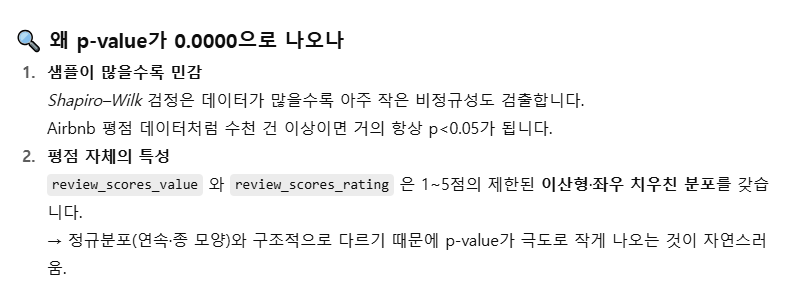

/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1854667735.py:16: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  plt.tight_la

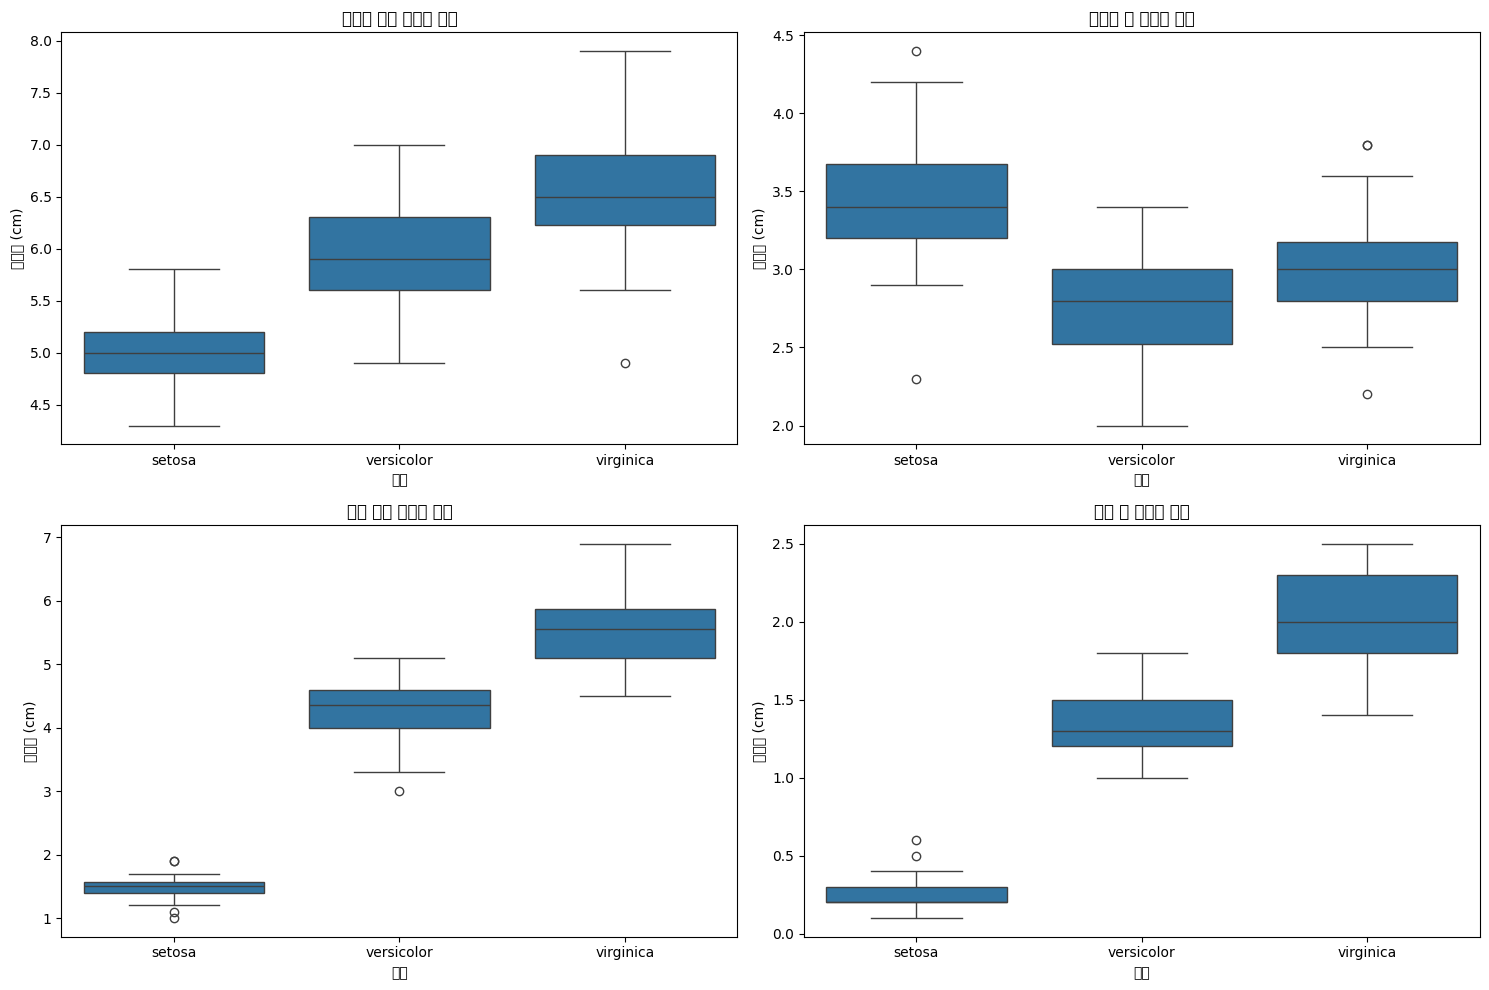

In [ ]:


# 2x2 서브플롯으로 박스플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, (room_type, name) in enumerate(zip(room_type, short_names)):
    sns.boxplot(data=df, x='room_type', y='review_score_', ax=axes[i])
    axes[i].set_title(f'{name} 숙소 유형별 분포')
    axes[i].set_xlabel('숙소')
    axes[i].set_ylabel('측정값 (cm)')

plt.tight_layout()
plt.show()

##EDA

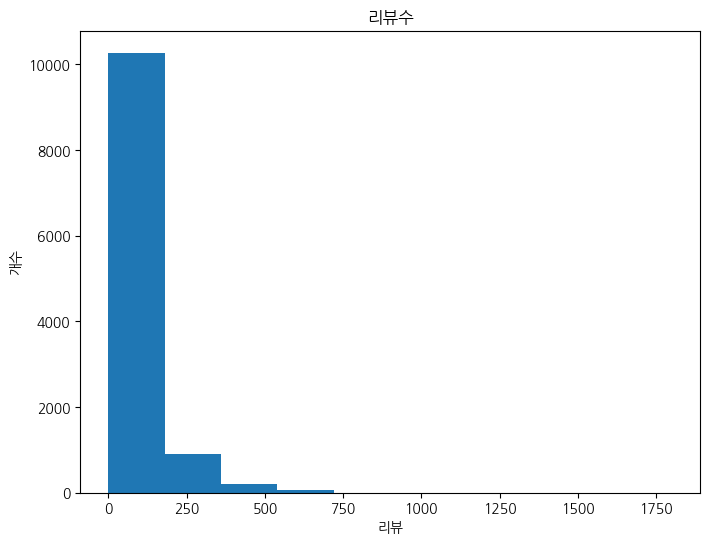

In [ ]:
#히스토그램 구현

plt.figure(figsize=(8,6))
plt.hist(data['number_of_reviews'])
plt.title('리뷰수')
plt.xlabel('리뷰')
plt.ylabel('개수')
plt.show()



---



###룸타입별

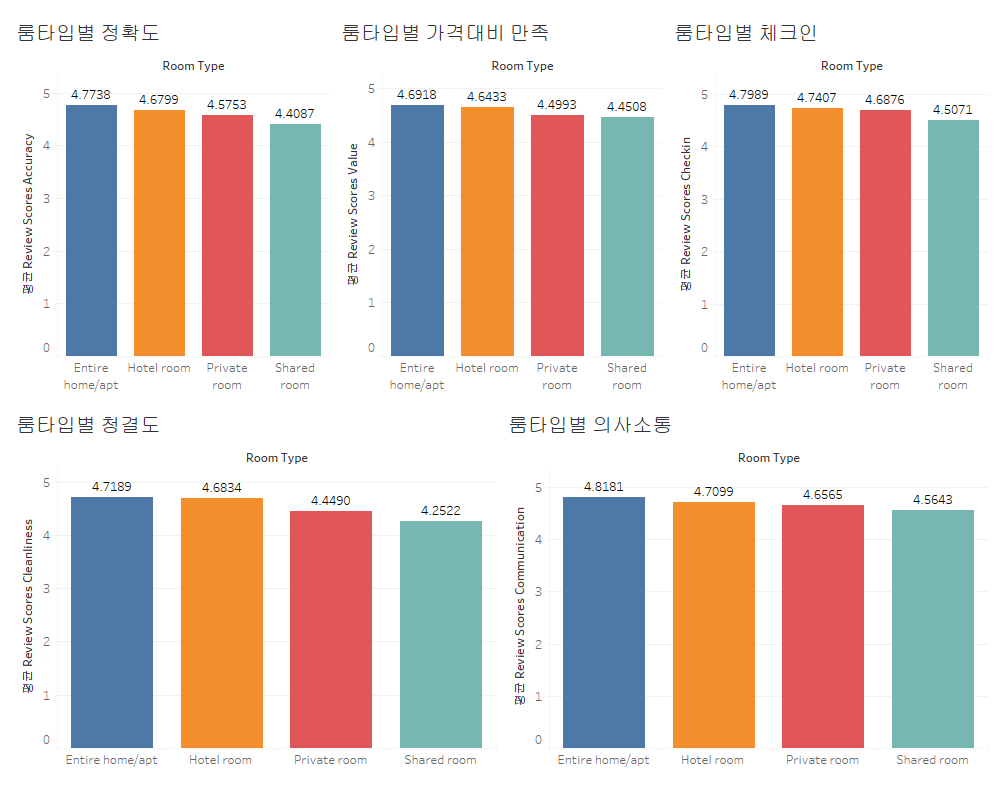